## Import packages

In [160]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

common pandas methods on dataframe object:
- .head()
- .dtypes
- .shape
- .describe()

## Load Data

In [6]:
station = pd.read_csv('station.csv', parse_dates=[6])
# parse_dates parameter will keep the specified column as data type = date
# dataframe shape: (70,7)

In [7]:
status = pd.read_csv('status.csv', parse_dates=[3])
# dataframe shape: (71984434, 4)
# this is the biggest dataset, takes about 2-3 minutes to load

In [9]:
trip = pd.read_csv('trip.csv', parse_dates=[2])
# dataframe shape: (669959, 11)

In [85]:
weather = pd.read_csv('weather.csv', parse_dates=[0])
# dataframe shape: (3665, 24)

## View data sample

In [12]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [13]:
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,2013-08-05
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,2013-08-06
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,2013-08-05
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,2013-08-07


In [14]:
status.head()

,station_id,bikes_available,docks_available,time
0,2,2,25,2013-08-29 12:06:01
1,2,2,25,2013-08-29 12:07:01
2,2,2,25,2013-08-29 12:08:01
3,2,2,25,2013-08-29 12:09:01
4,2,2,25,2013-08-29 12:10:01


In [15]:
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [16]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


## Further data exploration & cleaning

### Issue 1: zip_code is null in 6619 rows in trip dataset

In [44]:
# check trip data missing value
trip.isnull().sum()

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              6619
dtype: int64

In [45]:
# change duration to minutes
trip.duration /= 60

In [54]:
trip.dtypes

id                             int64
duration                     float64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date                      object
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
dtype: object

In [55]:
weather.dtypes

date                              datetime64[ns]
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles                     float64
max_wind_Speed_mph                       float64
mean_wind_speed_mph                      float64
max_gust_speed_mph                       float64
precipitation_inches                      object
cloud_cover         

### Issue 2: trip has 7440 unique zip_code, weather has only 5 unique zip_code

possible solution:
- count trip by day only (not by zip_code)

In [60]:
len(trip.zip_code.unique())

7440

In [61]:
len(weather.zip_code.unique())

5

In [62]:
trip.zip_code.unique()

array(['94127', '95138', '97214', ..., '2400105', '1004004', '29609'], dtype=object)

In [63]:
weather.zip_code.unique()

array(['94107', '94063', '94301', '94041', '95113'], dtype=object)

### Issue 3: non-numeric values in weather.precipitation_inches [resolved]

In [82]:
weather.precipitation_inches.unique()
# precipitation_inches column includes 'T', nan

array(['0', '0.23', 'T', '0.01', '0.28', '0.63', '0.29', '0.06', '0.85',
       '0.09', '0.64', '0.42', '0.35', '0.43', '0.22', '0.74', '0.03',
       '0.12', '0.16', '0.49', '0.17', '0.08', '0.04', '0.53', '0.07',
       '0.02', '0.83', '1.06', '1.71', '0.37', '0.27', '0.45', '0.78',
       '0.88', '0.66', '0.47', '0.1', '0.61', '0.14', '0.05', '0.68',
       '0.97', '0.26', '0.15', '0.87', '0.57', '0.69', '0.32', '0.21',
       '0.24', '0.52', '0.36', '0.33', '0.25', '0.11', '0.2', '1.18',
       '1.43', '3.12', '0.48', '0.19', '1.09', '0.65', '0.13', '0.91',
       '0.99', '0.18', '0.4', '1.07', nan, '0.41', '0.34', '1.25', '1.85',
       '3.36', '0.71', '1.3', '0.72', '0.6', '0.51', '1.2', '1.28', '3.23',
       '0.55', '1.26', '0.39'], dtype=object)

In [86]:
# replace 'T', nan with 0
weather.loc[weather.precipitation_inches == "T", 'precipitation_inches'] = 0
weather.loc[weather.precipitation_inches.isnull(), 'precipitation_inches'] = 0
weather.precipitation_inches = pd.to_numeric(weather.precipitation_inches)

In [87]:
weather.precipitation_inches.unique()

array([ 0.  ,  0.23,  0.01,  0.28,  0.63,  0.29,  0.06,  0.85,  0.09,
        0.64,  0.42,  0.35,  0.43,  0.22,  0.74,  0.03,  0.12,  0.16,
        0.49,  0.17,  0.08,  0.04,  0.53,  0.07,  0.02,  0.83,  1.06,
        1.71,  0.37,  0.27,  0.45,  0.78,  0.88,  0.66,  0.47,  0.1 ,
        0.61,  0.14,  0.05,  0.68,  0.97,  0.26,  0.15,  0.87,  0.57,
        0.69,  0.32,  0.21,  0.24,  0.52,  0.36,  0.33,  0.25,  0.11,
        0.2 ,  1.18,  1.43,  3.12,  0.48,  0.19,  1.09,  0.65,  0.13,
        0.91,  0.99,  0.18,  0.4 ,  1.07,  0.41,  0.34,  1.25,  1.85,
        3.36,  0.71,  1.3 ,  0.72,  0.6 ,  0.51,  1.2 ,  1.28,  3.23,
        0.55,  1.26,  0.39])

### Issue 4: missing values in weather dataset

In [88]:
# check weather data missing value
weather.isnull().sum()

date                                 0
max_temperature_f                    4
mean_temperature_f                   4
min_temperature_f                    4
max_dew_point_f                     54
mean_dew_point_f                    54
min_dew_point_f                     54
max_humidity                        54
mean_humidity                       54
min_humidity                        54
max_sea_level_pressure_inches        1
mean_sea_level_pressure_inches       1
min_sea_level_pressure_inches        1
max_visibility_miles                13
mean_visibility_miles               13
min_visibility_miles                13
max_wind_Speed_mph                   1
mean_wind_speed_mph                  1
max_gust_speed_mph                 899
precipitation_inches                 0
cloud_cover                          1
events                            3143
wind_dir_degrees                     1
zip_code                             0
dtype: int64

#### 1. weather.events

In [89]:
weather.events.unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'], dtype=object)

In [91]:
weather.events = weather.events.str.lower()

In [93]:
weather.loc[weather.events.isnull(), 'events'] = "normal"

In [94]:
weather.events.unique()

array(['normal', 'fog', 'rain', 'fog-rain', 'rain-thunderstorm'], dtype=object)

#### 2. weather.temperature

In [123]:
# impute missing value with median
weather.loc[weather.max_temperature_f.isnull(), 'max_temperature_f'] = weather[weather.max_temperature_f.notnull()].max_temperature_f.median()
weather.loc[weather.mean_temperature_f.isnull(), 'mean_temperature_f'] = weather[weather.mean_temperature_f.notnull()].mean_temperature_f.median()
weather.loc[weather.min_temperature_f.isnull(), 'min_temperature_f'] = weather[weather.min_temperature_f.notnull()].min_temperature_f.median()

In [ ]:
# impute missing value with median for mean_temperature_f
weather.loc[weather.mean_temperature_f.isnull(), 'mean_temperature_f'] = weather[weather.mean_temperature_f.notnull()].mean_temperature_f.median()

#### 3. impute for other fields if we need to use them

In [124]:
# ....

## Trip data: group by Day & Zip

- **`id`**: count of bike trips
- **`duration`**: total duration of bike trips

In [125]:
trip_count_by_day = trip.groupby([trip.start_date.dt.date,'zip_code']).agg({"id": "count", "duration":"sum"}).reset_index()
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

# set data type to "date" again
trip_count_by_day['start_date'] = trip_count_by_day['start_date'].astype('datetime64[s]')

# rename columns
trip_count_by_day.rename(columns = {'start_date':'date', 'zip_code':'zip', 'id':'count', }, inplace = True)

In [126]:
trip_count_by_day.head()

,date,zip,count,duration
0,2013-08-29,10003,4,75.150000
1,2013-08-29,10009,3,47.916667
2,2013-08-29,10010,3,164.383333
3,2013-08-29,10012,1,15.200000
4,2013-08-29,10014,1,12.116667


In [127]:
# check data types
trip_count_by_day.dtypes

date        datetime64[ns]
zip                 object
count                int64
duration           float64
dtype: object

## Weather data: feature selection

In [128]:
# change zip_code to string
weather['zip_code'] = weather['zip_code'].apply(str)

In [129]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,normal,286.0,94107
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0.0,2.0,normal,291.0,94107
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0.0,4.0,normal,284.0,94107
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0.0,4.0,normal,284.0,94107
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0.0,6.0,normal,277.0,94107


In [130]:
weather.dtypes

date                              datetime64[ns]
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles                     float64
max_wind_Speed_mph                       float64
mean_wind_speed_mph                      float64
max_gust_speed_mph                       float64
precipitation_inches                     float64
cloud_cover         

## merge trip_count_by_day and weather dataframes

In [131]:

data = pd.merge(trip_count_by_day, weather, left_on=['date','zip'], right_on=['date','zip_code'])

In [132]:
data.head()

,date,zip,count,duration,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,94041,5,44.766667,80.0,70.0,64.0,65.0,61.0,58.0,...,10.0,10.0,16.0,5.0,16.0,0.0,4.0,normal,355.0,94041
1,2013-08-29,94063,2,62.650000,80.0,71.0,62.0,63.0,59.0,57.0,...,10.0,10.0,14.0,6.0,17.0,0.0,5.0,normal,313.0,94063
2,2013-08-29,94107,37,423.366667,74.0,68.0,61.0,61.0,58.0,56.0,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,normal,286.0,94107
3,2013-08-29,94301,4,944.566667,78.0,71.0,64.0,62.0,61.0,60.0,...,10.0,10.0,20.0,8.0,23.0,0.0,4.0,normal,355.0,94301
4,2013-08-29,95113,2,49.266667,81.0,72.0,63.0,62.0,61.0,59.0,...,10.0,10.0,16.0,7.0,24.0,0.0,4.0,normal,320.0,95113


## X

In [133]:
# select features for our prediction model
X = data[['mean_temperature_f', 'precipitation_inches', 'cloud_cover', 'events']]

In [134]:
X.dtypes

mean_temperature_f      float64
precipitation_inches    float64
cloud_cover             float64
events                   object
dtype: object

In [135]:
# convert events from object to one-hot representation
# since model.fit() doest not accept str
X = pd.get_dummies(X, columns=['events'])

In [136]:
X.head()

,mean_temperature_f,precipitation_inches,cloud_cover,events_fog,events_fog-rain,events_normal,events_rain,events_rain-thunderstorm
0,70.0,0.0,4.0,0,0,1,0,0
1,71.0,0.0,5.0,0,0,1,0,0
2,68.0,0.0,4.0,0,0,1,0,0
3,71.0,0.0,4.0,0,0,1,0,0
4,72.0,0.0,4.0,0,0,1,0,0


## Y

In [137]:
Y = data[['count']]

In [138]:
Y.dtypes

count    int64
dtype: object

In [139]:
Y.head()

,count
0,5
1,2
2,37
3,4
4,2


In [144]:
Y.shape

(3287, 1)

## SVM

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [161]:
# 10-fold cv
def scoring(model):
    scores = cross_val_score(model, X, Y, cv=10, n_jobs=1, scoring = 'neg_median_absolute_error')
    print (np.median(scores) * -1)

In [163]:
svm = svm.SVR()

In [164]:
scoring(svm)

/Users/xinyi/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xinyi/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xinyi/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xinyi/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

4.89280588962


In [165]:
Y.median()

count    8.0
dtype: float64

In [166]:
svm.fit(X,Y)
# fit() does not accept str

/Users/xinyi/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [147]:
Y_svm = model.fit(X, Y).predict(X)

/Users/xinyi/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


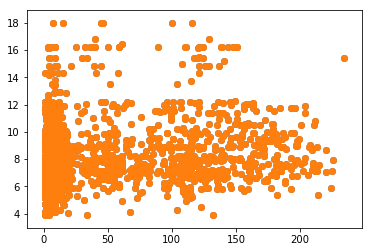

In [157]:
plt.scatter(Y, Y_svm)
plt.show()